<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter6/Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Import modules

In [2]:
import numpy as np
from numpy.random import rand , randn
from numpy.linalg import norm , solve, inv
import matplotlib.pyplot as plt
import scipy
import math 
from scipy.special import gamma
from sklearn import linear_model
print(scipy.__version__)
print(np.__version__)

1.4.1
1.19.5


##Set random seed

In [3]:
np.random.seed(12)

# Generate events

In [4]:
def generate_y(n):
   x = np.random.rand(n, 1)*10
   y = -1.5+0.5*x + np.random.randn(n, 1)
   return x, y

In [5]:
N = 1000
x, y = generate_y(N)
print(np.mean(y))

1.030363600470214


## Loss function

In [6]:
def loss_function(b0, b1):
  sum_var = 0.0
  for i in range(N):
    var_y = (y[i]-(b0+b1*x[i]))**2
    sum_var += var_y
  return sum_var/N



## Contour

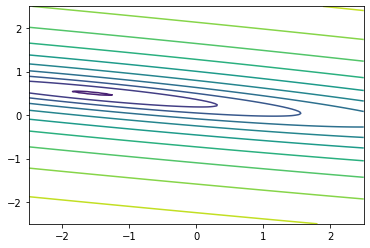

In [7]:
n_contour = 200

bb0 = np.linspace(-2.5, 2.5, n_contour)
bb1 = np.linspace(-2.5, 2.5, n_contour)
b0, b1 = np.meshgrid(bb0, bb1)
loss_contour = loss_function(b0,b1)

plt.contour(b0, b1, np.log(loss_contour), 10);

# Penalize both parameters

[-1.40555306  0.48121317]
[-1.08009159  0.43107879]
[-0.05115158  0.27257839]
[-0.          0.24527721]
[0.         0.18287958]
[0. 0.]
[0. 0.]
[0. 0.]


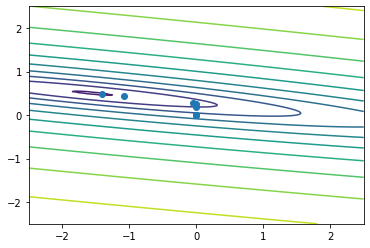

In [8]:
gamma = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])
gamma = np.sqrt(gamma)
g = gamma.shape[0]
beta_hat = np.zeros((g,2))
X = np.vstack((np.ones(N),x.T)).T
for i in range(g):
  clf = linear_model.Lasso(gamma[i], fit_intercept=False)
  clf.fit(X,y)
  print(clf.coef_)
  beta_hat[i][0] = clf.coef_[0]
  beta_hat[i][1] = clf.coef_[1]

plt.contour(b0, b1, np.log(loss_contour), 10);
plt.plot(beta_hat.T[0], beta_hat.T[1], 'o')
plt.show()


## Penalize beta1 only

-1.5370087789436173
0.5006657431020868
-1.495055373364249
0.4924843693565091
-1.3623870561326292
0.4666125939313806
-0.942853000338945
0.3847988564756034
0.38383017197725644
0.12608110222431826
1.030363600470214
0.0
1.030363600470214
0.0
1.030363600470214
0.0


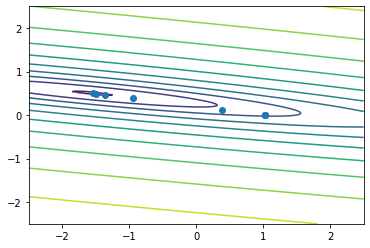

In [9]:
for i in range(g):
  clf = linear_model.Lasso(gamma[i])
  clf.fit(x,y)
  print(clf.intercept_[0])
  print(clf.coef_[0])
  beta_hat[i][1] = clf.coef_[0]
  beta_hat[i][0] = clf.intercept_[0]

plt.contour(b0, b1, np.log(loss_contour), 10);
plt.plot(beta_hat.T[0], beta_hat.T[1], 'o')
plt.show()

## Example 6.3

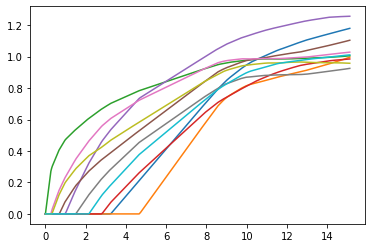

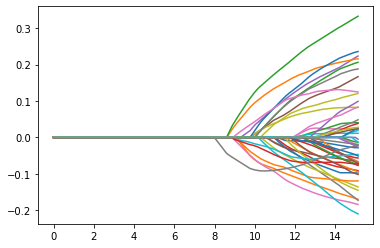

In [18]:
N = 150
Ng = 1000
p = 60
p_true = 10
beta = np.concatenate((np.ones(p_true), np.zeros(p-p_true)))
p_est = np.zeros((Ng, p))
XX = np.random.randn(N,p)
YY = XX @ beta + np.random.randn((N))

gg = np.linspace(-4, 2, num=Ng)
gg = np.power(10,gg)

for i in range(Ng):
  clf = linear_model.Lasso(gg[i])
  clf.fit(XX,YY)
  p_est[i] = clf.coef_


pnorm = np.linalg.norm(p_est, axis=1, ord=1)

for i in range(p_true):
    plt.plot(pnorm, p_est.T[i], '-')

#plt.xscale('log')
plt.show()

for i in range(p-p_true):
    plt.plot(pnorm, p_est.T[i+p_true], '-')

#plt.xscale('log')
plt.show()